In [2]:
from IPython.display import clear_output
import rebound
import matplotlib.pyplot as plt
import numpy as np

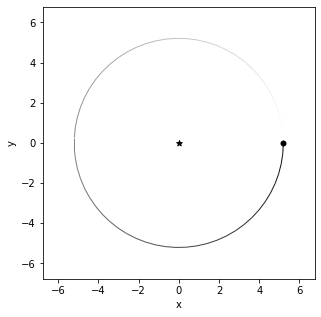

In [11]:
fig, ax = rebound.OrbitPlot(sim)

In [6]:
sim = rebound.Simulation()

AU = 1.496e11
#sim.G = 6.6743e-11 # m^3 / kg s^2
sim.add(m=1)
sim.add(m=0.0009547919099366768,a=5.2029870847982975)
#sim.add(m=0.0009547919099366768, x=4.700873257350307, y=-1.638871658756794, z=-0.09837100227914734, vx=0.1391574941369194, vy=0.4348006080824522, vz=-0.004917193679728236)
sim.move_to_com()
#sim.integrator = "mercurius"

sim.integrator = "whfast"
sim.dt = 0.1

0.999 30 / 30


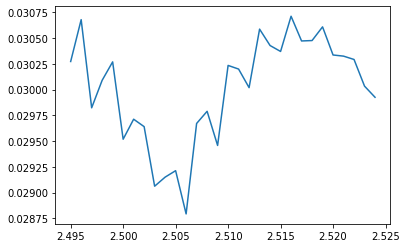

In [7]:
a_list = []
i_list = []
jup_list = []
rings = 600
delta_a_list = []
orbit_list = []
starting_orbit = 2.4
simtime = 1000

for ring in range(rings):
    a_list = []
    #i_list = []

    sim.add(m=1e-28,a=(starting_orbit+(0.001*ring)), omega = 2.5*np.pi,e = 0.1)
    for i in range(simtime):
        #sim.integrate(i*60*60*24)
        
        sim.step()
        a_list.append(sim.particles[2].a)
        jup_list.append(sim.particles[1].a)
        #i_list.append(i)
        
        clear_output(wait=True)
        print(i/(simtime),ring+1,"/",rings)
    
    delta_a_list.append(max(a_list)-min(a_list))
    orbit_list.append((starting_orbit+(0.001*ring)))
    
    sim.remove(2)


plt.plot(orbit_list,delta_a_list)
plt.show()

In [5]:
print(sim.particles[1].a)

5.202987084798194


In [9]:
print(0.40*AU)

59840000000.0


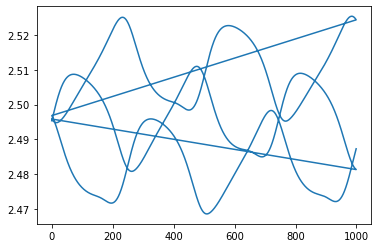

In [19]:
plt.plot(i_list,a_list)
plt.show()

In [16]:
sim.status()

---------------------------------
REBOUND version:     	3.19.1
REBOUND built on:    	Jan 16 2022 12:05:30
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	1.2130903967570166e+10
Current timestep:    	1762721.881477
---------------------------------
<rebound.particle.Particle object at 0x7f6bffb15ec0, m=1.98847e+30 x=593899223.0258479 y=-445471925.15245557 z=0.0 vx=7.4751438180411744 vy=9.965795496590466 vz=0.0>
<rebound.particle.Particle object at 0x7f6bffb158c0, m=1.89813e+27 x=-622165388045.156 y=466673810017.08 z=0.0 vx=-7830.917391253667 vy=-10440.109671679631 vz=0.0>
<rebound.particle.Particle object at 0x7f6bffb15ec0, m=5000.0 x=362869377976.7955 y=89539537494.45052 z=0.0 vx=-1894.3086225053887 vy=18760.860145365346 vz=0.0>
---------------------------------
